In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Data
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.describe()
df.isnull().sum()  # Missing values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  39 non-null     int64  
 1   Survived     39 non-null     int64  
 2   Pclass       39 non-null     int64  
 3   Name         39 non-null     object 
 4   Sex          39 non-null     object 
 5   Age          30 non-null     float64
 6   SibSp        39 non-null     int64  
 7   Parch        39 non-null     int64  
 8   Ticket       39 non-null     object 
 9   Fare         39 non-null     float64
 10  Cabin        9 non-null      object 
 11  Embarked     39 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.8+ KB


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             9
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          30
Embarked        0
dtype: int64

In [13]:
# Fill 'Age' missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)




In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
df.drop_duplicates(inplace=True)



In [18]:
#  If PassengerId should be int
df['PassengerId'] = df['PassengerId'].astype(int)


In [19]:
# Standardize 'Sex' values
df['Sex'] = df['Sex'].str.strip().str.lower()


In [20]:
df.to_csv("titanic_cleaned.csv", index=False)
print("Data cleaned & saved as titanic_cleaned.csv")


Data cleaned & saved as titanic_cleaned.csv


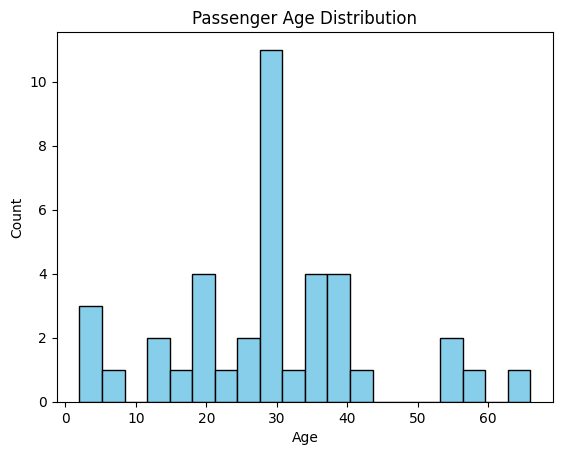

In [21]:
# Histogram of Age
plt.hist(df["Age"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\TUSHAR'S PC\AppData\Local\Temp\ipykernel_33468\1406946738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=df, palette="pastel")


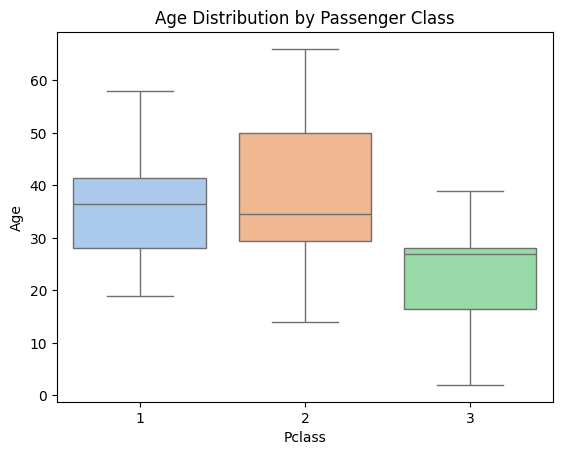

In [22]:
import seaborn as sns

# Boxplot for Age by Pclass
sns.boxplot(x="Pclass", y="Age", data=df, palette="pastel")
plt.title("Age Distribution by Passenger Class")
plt.show()


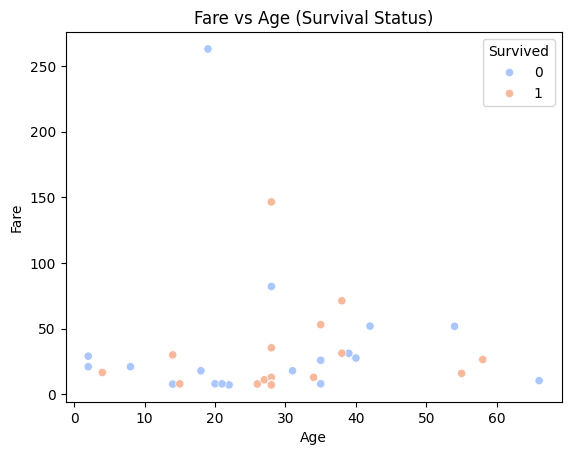

In [23]:
# Scatterplot Fare vs Age, color by Survived
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="coolwarm")
plt.title("Fare vs Age (Survival Status)")
plt.show()


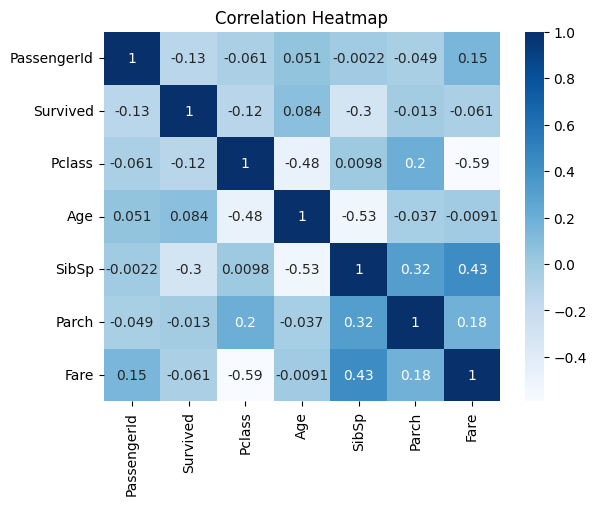

In [24]:
# Heatmap of numerical columns
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()
